<a href="https://colab.research.google.com/github/RajashreeDahal4/License_plate_detection/blob/main/license_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imutils
from google.colab.patches import cv2_imshow

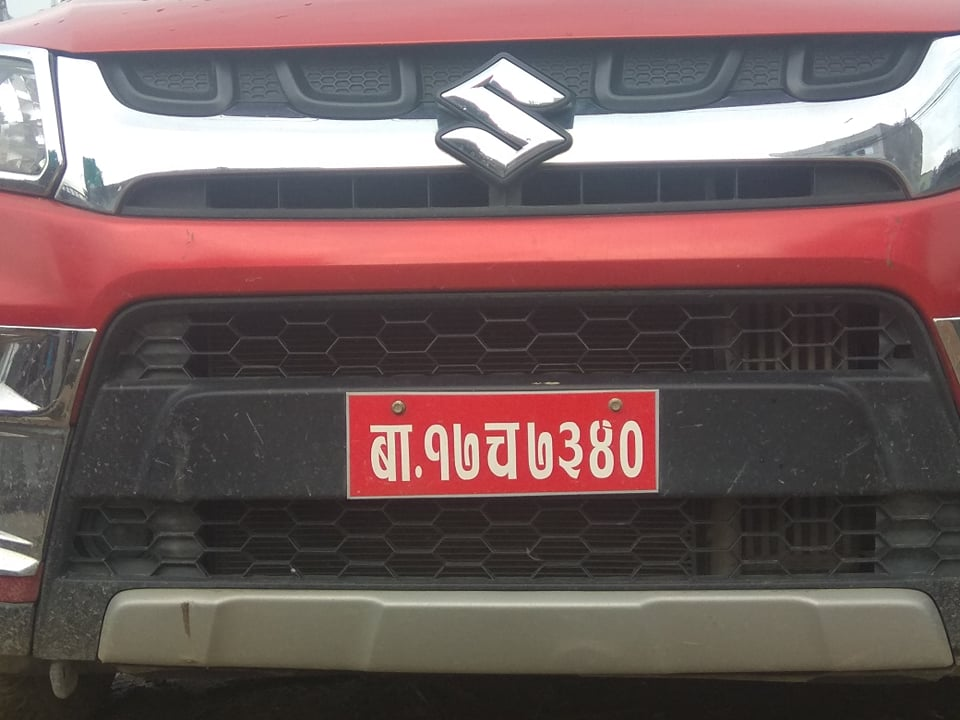

In [5]:
img = cv2.imread('/content/2.jpg')
cv2_imshow(img)

In [7]:
def thresholding(image):
    return cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
def canny1(image):
    # return cv2.Canny(image, 100, 200)
    return cv2.Canny(image, 30,200)
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

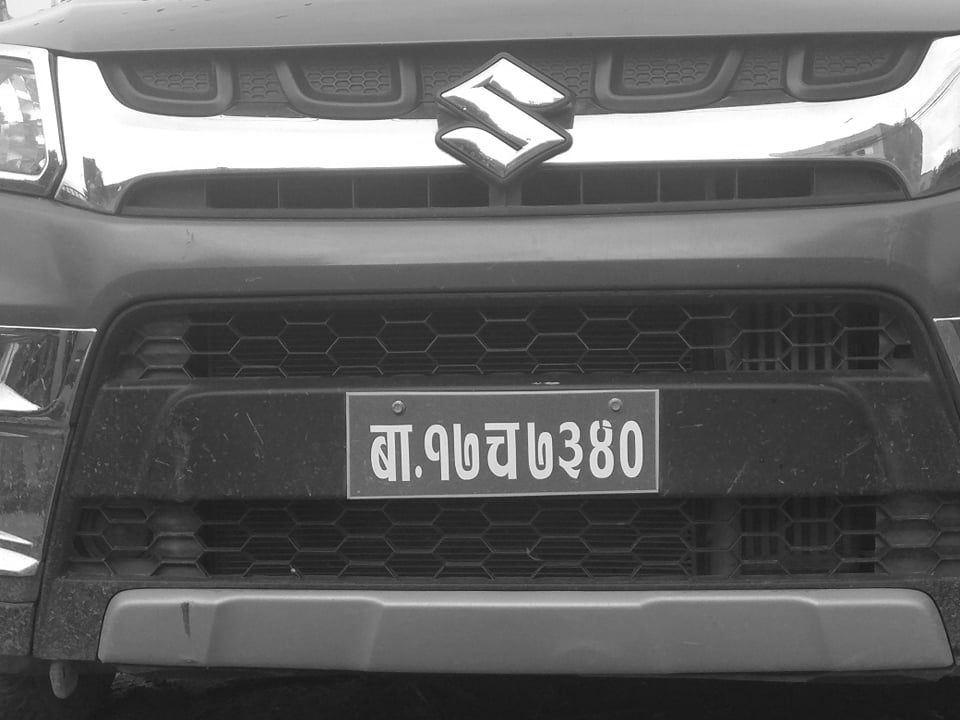

In [8]:
gray=get_grayscale(img)
cv2_imshow(gray)

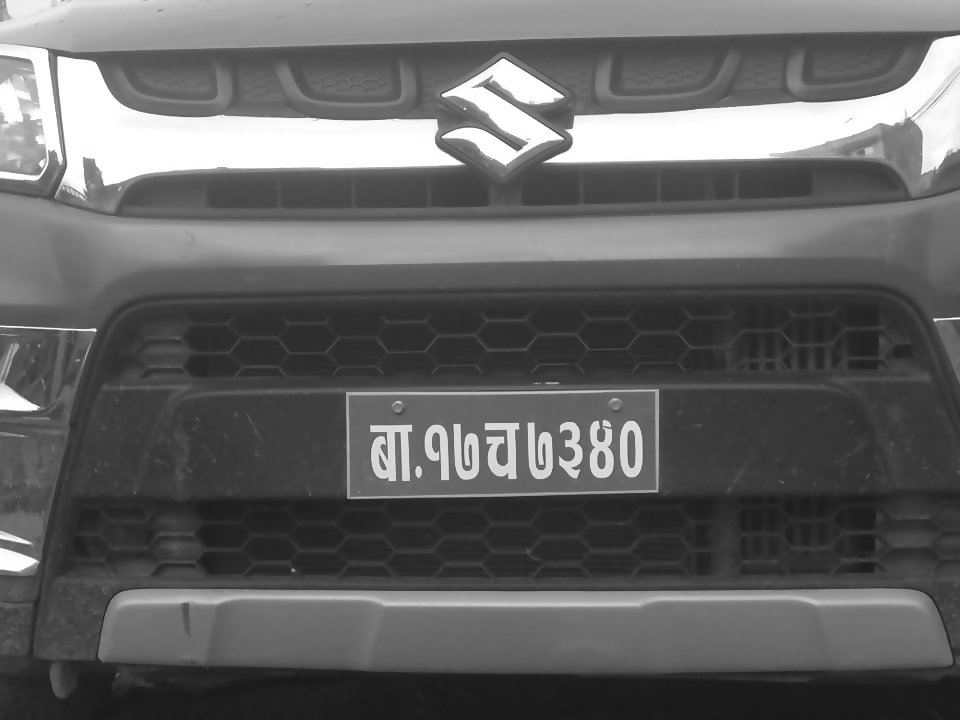

In [9]:
filter=cv2.bilateralFilter(gray,7,17,17)
cv2_imshow(filter)

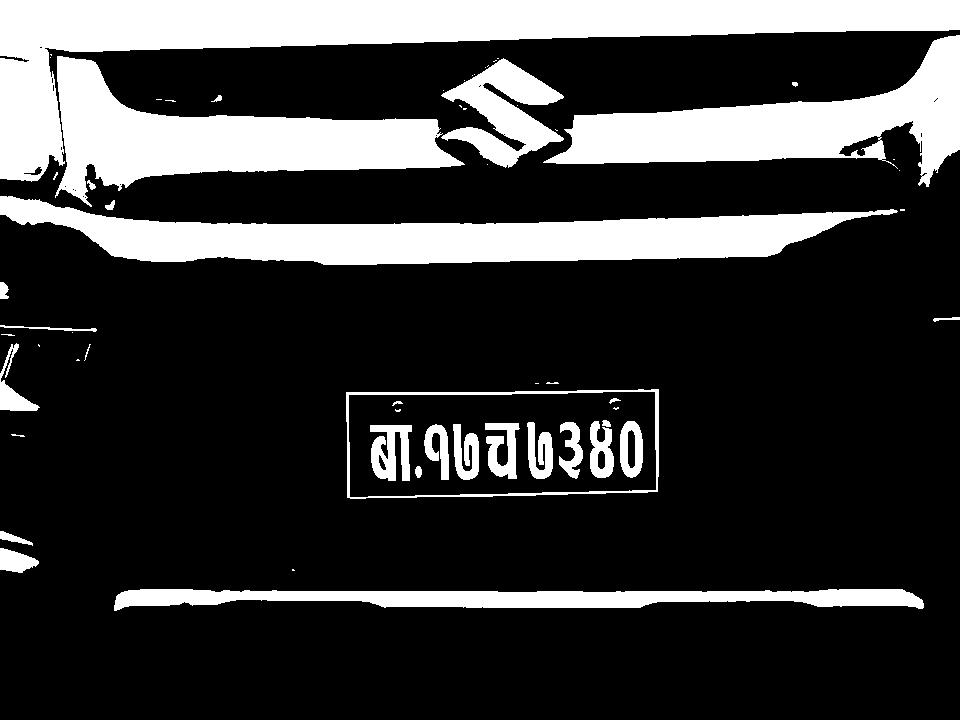

In [10]:
thresh=thresholding(filter)
cv2_imshow(thresh)

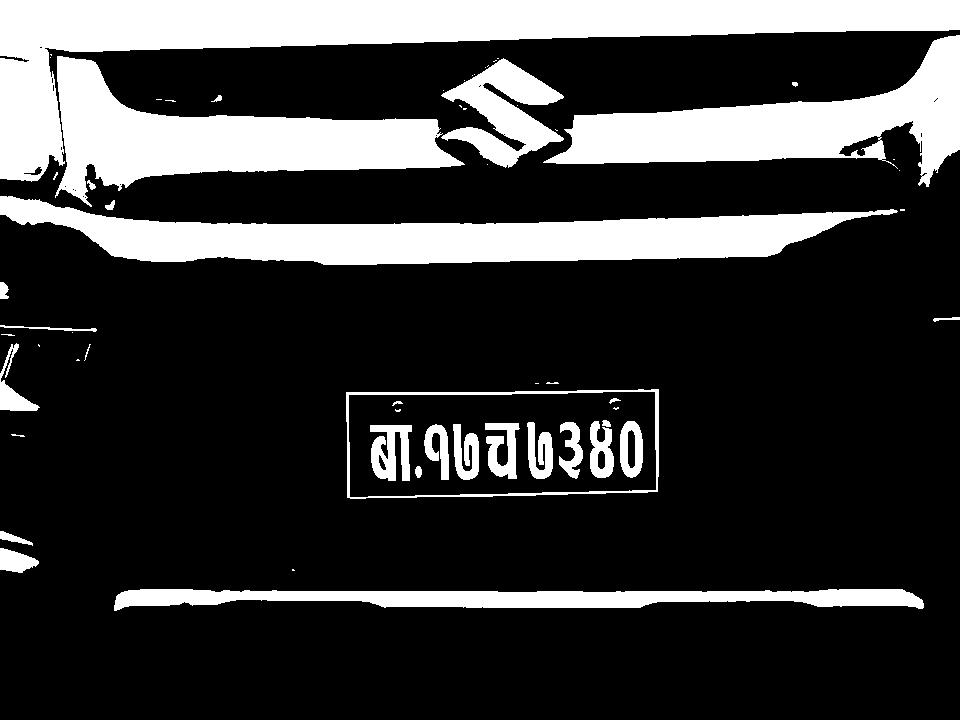

In [11]:
kernel=np.ones((1,1),np.uint8)
erode=cv2.erode(thresh,kernel,iterations=1)
cv2_imshow(erode)

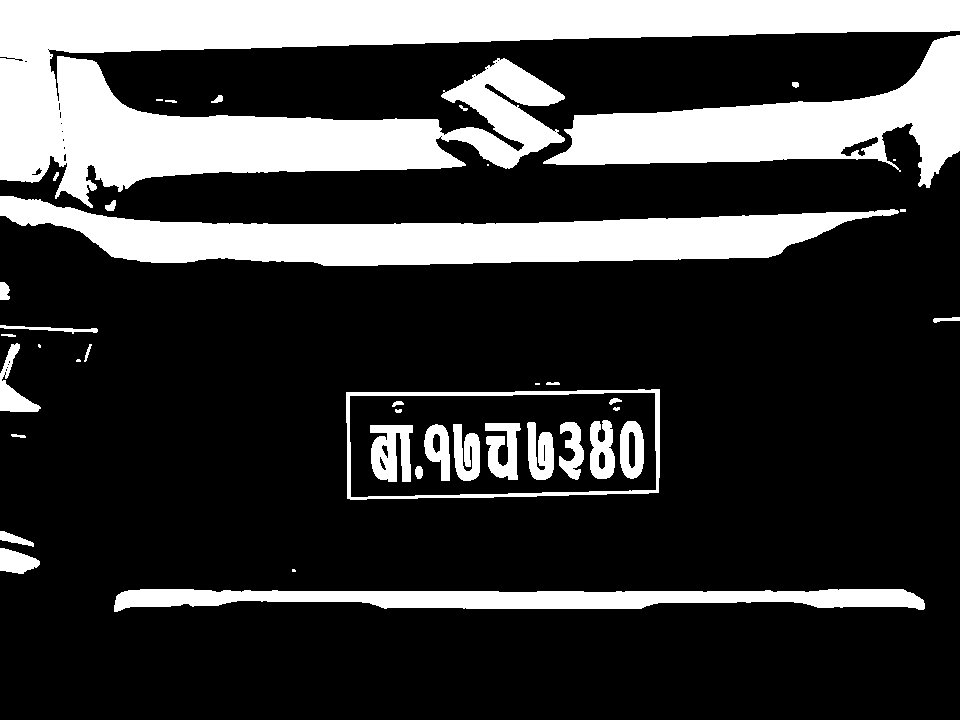

In [12]:
kernel1=np.ones((2,2),np.uint8)
dilate1=cv2.dilate(erode,kernel1,iterations=1)
cv2_imshow(dilate1)

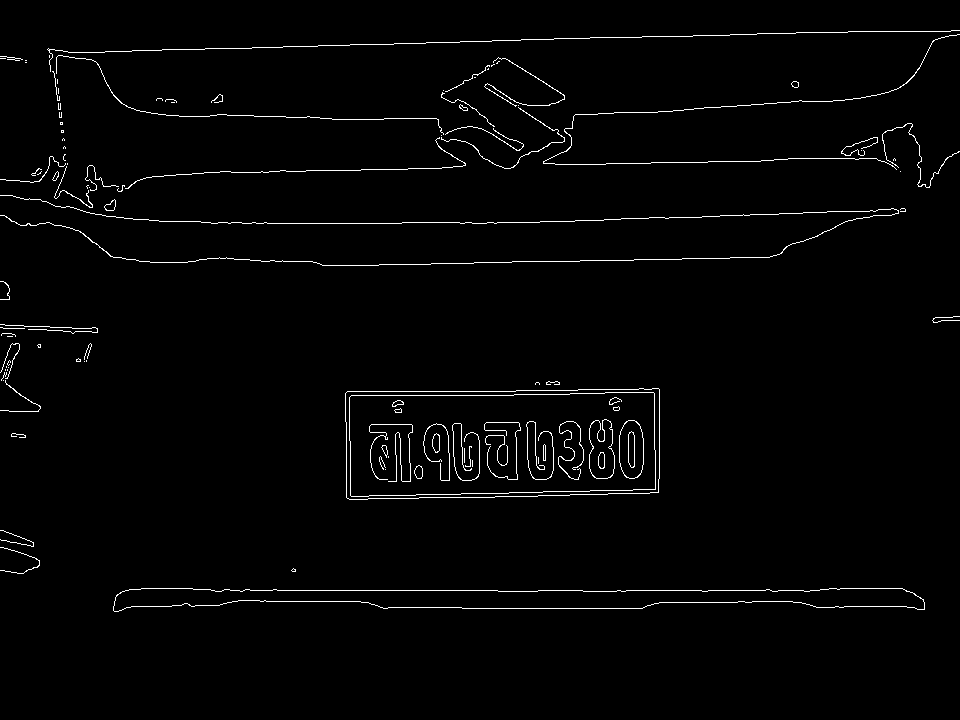

In [13]:
canny2 = canny1(dilate1)
cv2_imshow(canny2)

In [14]:
points=cv2.findContours(canny2.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(points)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [15]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,15,True)
  if len(approx==4):
    location=approx
    break


In [16]:
location

array([[[659, 389]],

       [[347, 391]],

       [[346, 497]],

       [[658, 492]]], dtype=int32)

In [17]:
mask = np.zeros(canny2.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img,img, mask=mask)

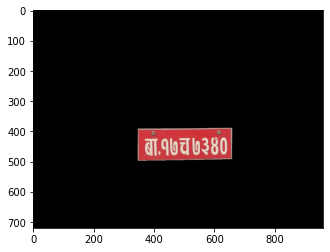

In [18]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [19]:
!pip install easyocr

     |████████████████████████████████| 63.6 MB 8.5 kB/s 


In [20]:
import easyocr

In [21]:
reader=easyocr.Reader(['ne'])
data=reader.readtext(new_image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [22]:
print(data)

[([[359, 410], [653, 410], [653, 490], [359, 490]], 'वा.१७च७३४०', 0.6429748791241906)]


In [23]:
import pprint
pp=pprint.PrettyPrinter(indent=4)
pp.pprint([text[-2] for text in data])

['वा.१७च७३४०']
